<a href="https://colab.research.google.com/github/julianamu323/Proyectos/blob/main/Afecciones_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Proyectos/Datos/heart_attack_youth_adult_france.csv',
                   sep = ',',
                   low_memory = False)
datos.head(5)

,Patient_ID,Age,Sex,Weight_kg,Height_cm,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Smoking_Status,...,Exercise_Induced_Pain,Heart_Attack,Age_Group,Region,Air_Pollution_Level,Income_Level,Education_Level,Health_Insurance,Regular_Checkups,Medication_Adherence
0,1,56,Male,118.4,184,35.4,96,94,204.3,Ex-Smoker,...,No,No,Adult,Central,67,Medium,College,Yes,Occasionally,Yes
1,2,46,Male,50.7,164,32.6,114,65,279.4,Non-Smoker,...,No,Yes,Adult,North,16,Low,High School,Yes,Occasionally,Yes
2,3,32,Male,118.0,179,39.8,98,118,291.4,Current Smoker,...,No,No,Adult,South,32,Medium,College,Yes,Frequently,Yes
3,4,60,Male,96.8,161,23.7,108,101,273.3,Non-Smoker,...,No,No,Youth,East,86,Low,College,Yes,Occasionally,Yes
4,5,25,Male,53.9,169,24.4,141,73,290.8,Ex-Smoker,...,No,No,Youth,South,15,Low,High School,Yes,Occasionally,No


In [ ]:
data = datos.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266786 entries, 0 to 266785
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                266786 non-null  int64  
 1   Age                       266786 non-null  int64  
 2   Sex                       266786 non-null  object 
 3   Weight_kg                 266786 non-null  float64
 4   Height_cm                 266786 non-null  int64  
 5   BMI                       266786 non-null  float64
 6   Blood_Pressure_Systolic   266786 non-null  int64  
 7   Blood_Pressure_Diastolic  266786 non-null  int64  
 8   Cholesterol_Level         266786 non-null  float64
 9   Smoking_Status            266786 non-null  object 
 10  Alcohol_Consumption       266786 non-null  int64  
 11  Physical_Activity_Hours   266786 non-null  float64
 12  Diabetes                  266786 non-null  object 
 13  Family_History            266786 non-null  o

De acuerdo a la información de los datos, tenemos 27 variables entre cuantitativas y cualitativas siendo de tipo enteros, float y objetos. Además, no se presentan nulos en cada una de las variables a estudiar.

### **Descripción de las variables.**

Dentro del conjunto de datos podemos encontrar variables de tipo cuantitativo y cualitativo las cuales se describen a continuación:

#### **Variables cuantitativas:**
- **Patient ID:** Identificación del paciente (1 - 10.000).
- **Age:** Edad (18 años - 60 años).
- **Weight_kg:** Peso medido en kilogramos (kg).
- **Height_cm:** Altura medida en centímetros (cm).
- **BMI:** Índice de masa corporal.
- **Blood Pressure Systolic:** Presión Arterial Sistólica (90 - 179).
- **Blood Pressure Diastolic:** Presión Arterial Diastólica (60 - 119).
- **Cholesterol Level:** Nivel de colesterol (150.0 - 300.0).
- **Alcohol Consumption:** Consumo de alcohol (0 - 19).
- **Physical Activity hours:** Horas de actividad física (0.0 - 9.9).
- **Stress level:** Nivel de estrés (1 - 10).
- **Heart rate:** Frecuencia cardiaca.
- **Air Pollution level:** Nivel de contaminación del aire (1 - 100).

#### **Variables cualitativas:**
- **Sex:** Sexo (Female, Male y other).
- **Smoking Status:** Estado de fumador (Ex-Smoker, Non-Smoker y Current-Smoker).
- **Diabetes:** Diabetes (Yes - No).
- **Family History:** Historia familiar (Yes - No).
- **Diet type:** Tipo de dieta (Healthy, Mixed y Unheralthy).
- **Excersice Induced Pain:** Dolor inducido por el ejercicio (Yes - No).
- **Heart attack:** Ataque al corazón (Yes - No).
- **Age group:** Grupo o rango de edad (Adulth - Youth).
- **Region:** Región (norte, sur, centro, oeste y este de Francia).
- **Income level:** Nivel de ingresos (High, Low, Medium).
- **Education level:** Nivel de educación (College, Graduate, High School).
- **Health Insurance:** Seguros de salud (Yes - No).
- **Regular Checkups:** Chequeos regulares (Frequently, Occasionally, Rarely).
- **Medication adherence:** Adherencia a la medicación (Yes - No).

Con el fin de mejorar la comprensión de la base de datos, se opta por nombrar algunas de las variables de estudio:

- **Weight_kg:** Weight.
- **Height_cm:** Height.
- **Blood Pressure Sytolic:** BPS.
- **Blood Pressure Diastolic:** BPD.
- **Cholesterol level:** Cholesterol.
- **Physical Activity Hours:** PAH.
- **Excersice Induced Pain:** EIP.

In [ ]:
# Renombramiento de algunas variables.
data.rename(columns={'Weight_kg':'Weight', 'Height_cm':'Height',
                     'Blood_Pressure_Systolic':'BPS',
                     'Blood_Pressure_Diastolic':'BPD',
                     'Cholesterol_Level':'Cholesterol',
                     'Physical_Activity_Hours':'PAH',
                     'Exercise_Induced_Pain':'EIP'}, inplace=True)

# Eliminación de variables que no aportan mayor información.
data = data.drop(columns=['Patient_ID'])

# Eliminación de datos nulos.
data = data.dropna()

# Eliminación de filas repetidas.
data = data.drop_duplicates()

In [ ]:
# Información estadística de las variables cuantitativas.
data.describe()

,Age,Weight,Height,BMI,BPS,BPD,Cholesterol,Alcohol_Consumption,PAH,Stress_Level,Heart_Rate,Air_Pollution_Level
count,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000
mean,39.012842,85.030971,174.469504,29.239231,134.528686,89.458386,224.816570,9.498085,7.497130,5.491105,84.506342,50.497642
std,12.399825,20.185945,14.448139,6.199761,25.980116,17.326668,43.292459,5.768155,4.334888,2.870952,20.210596,28.871217
min,18.000000,50.000000,150.000000,18.500000,90.000000,60.000000,150.000000,0.000000,0.000000,1.000000,50.000000,1.000000
25%,28.000000,67.600000,162.000000,23.900000,112.000000,74.000000,187.200000,4.000000,3.700000,3.000000,67.000000,25.000000
50%,39.000000,85.000000,174.000000,29.200000,134.000000,89.000000,224.800000,9.000000,7.500000,5.000000,84.000000,51.000000
75%,50.000000,102.500000,187.000000,34.600000,157.000000,104.000000,262.200000,15.000000,11.300000,8.000000,102.000000,76.000000
max,60.000000,120.000000,199.000000,40.000000,179.000000,119.000000,300.000000,19.000000,15.000000,10.000000,119.000000,100.000000


In [ ]:
# Correlación entre los datos.
corr = data.corr(numeric_only=True)
corr

,Age,Weight,Height,BMI,BPS,BPD,Cholesterol,Alcohol_Consumption,PAH,Stress_Level,Heart_Rate,Air_Pollution_Level
Age,1.000000,0.000108,-0.003760,0.001154,0.000985,-0.000881,0.003709,-0.001129,-0.001626,-0.001105,-0.001452,-0.002021
Weight,0.000108,1.000000,-0.000915,0.000653,0.002798,0.001410,0.001014,-0.002391,-0.001862,-0.001234,-0.001277,-0.001949
Height,-0.003760,-0.000915,1.000000,-0.001774,0.003153,-0.004675,-0.000163,-0.001399,0.000442,0.000283,0.002222,-0.001423
BMI,0.001154,0.000653,-0.001774,1.000000,-0.000051,-0.000929,-0.000079,0.000498,0.001044,0.000224,0.000999,0.001719
BPS,0.000985,0.002798,0.003153,-0.000051,1.000000,-0.000207,-0.000429,-0.005487,-0.002481,0.002151,0.002859,-0.004027
BPD,-0.000881,0.001410,-0.004675,-0.000929,-0.000207,1.000000,-0.000222,-0.001718,0.002983,-0.001440,-0.003665,0.001210
Cholesterol,0.003709,0.001014,-0.000163,-0.000079,-0.000429,-0.000222,1.000000,-0.001674,0.002450,0.000686,-0.001387,-0.001573
Alcohol_Consumption,-0.001129,-0.002391,-0.001399,0.000498,-0.005487,-0.001718,-0.001674,1.000000,-0.001364,-0.000981,0.000878,-0.003401
PAH,-0.001626,-0.001862,0.000442,0.001044,-0.002481,0.002983,0.002450,-0.001364,1.000000,0.003582,0.003835,-0.001409
Stress_Level,-0.001105,-0.001234,0.000283,0.000224,0.002151,-0.001440,0.000686,-0.000981,0.003582,1.000000,0.001054,-0.000913


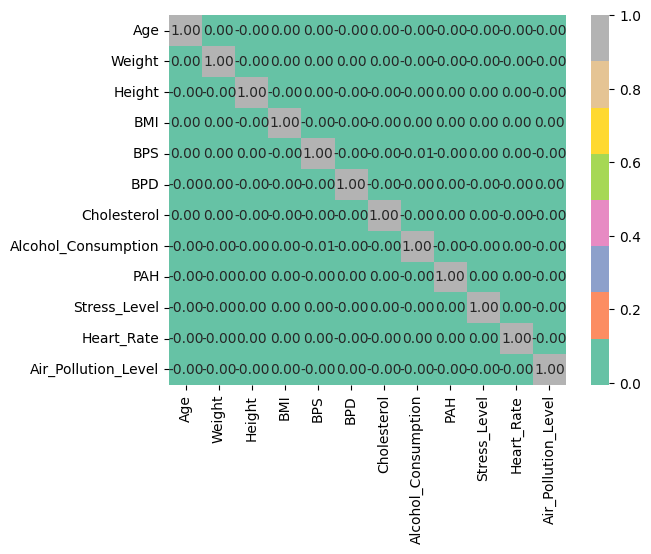

In [ ]:
# Graficamente.
sns.heatmap(corr, cmap='Set2', annot = True, fmt = '.2f')
plt.show()

Según los resultados anteriores se observa la baja correlación que existe entre las variables por pares.

## **Preguntas objetivo.**

1. ¿Podemos predecir infartos con datos sobre salud y estilo de vida?
2. ¿Existen grupos de personas con perfiles de riesgo similares?
3. ¿La contaminación atmosférica es un factor determinante para aumenta las tasas de infartos?
4. ¿Los cambios en el IMC (Índice de masa corporal) y la actividad física pueden influir en los riesgos?

# **Bibliografía.**

**Notas:**
- [Regresión Logística](https://aws.amazon.com/es/what-is/logistic-regression/#:~:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20una,factores%20bas%C3%A1ndose%20en%20el%20otro.)
- [Cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis)
- [Cluster analysis](https://www.spotfire.com/glossary/what-is-cluster-analysis#:~:text=Cluster%20analysis%20is%20a%20data,is%20an%20unsupervised%20learning%20method.)
- [Datos](https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-youth-vs-adult-in-france)
- [Ideas](https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-youth-vs-adult-in-germany/code)